# customer churn prediction 

## 1) Loading dataset

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\sopan\Desktop\jupyter\All dataset\kaggle customer churn\Churn_Modelling.csv")

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


## 2) Data cleaning and preprocessing 

In [5]:
#Missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* there is not a single missing value in dataset.

In [6]:
#Creating numerical feature and having more than 2 Unique datapoints (not binary features )
numerical_vars =[feature for feature in data.columns if data[feature].dtype != "O" and 
      len(data[feature].unique()) >2]

In [7]:
numerical_vars

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'EstimatedSalary']

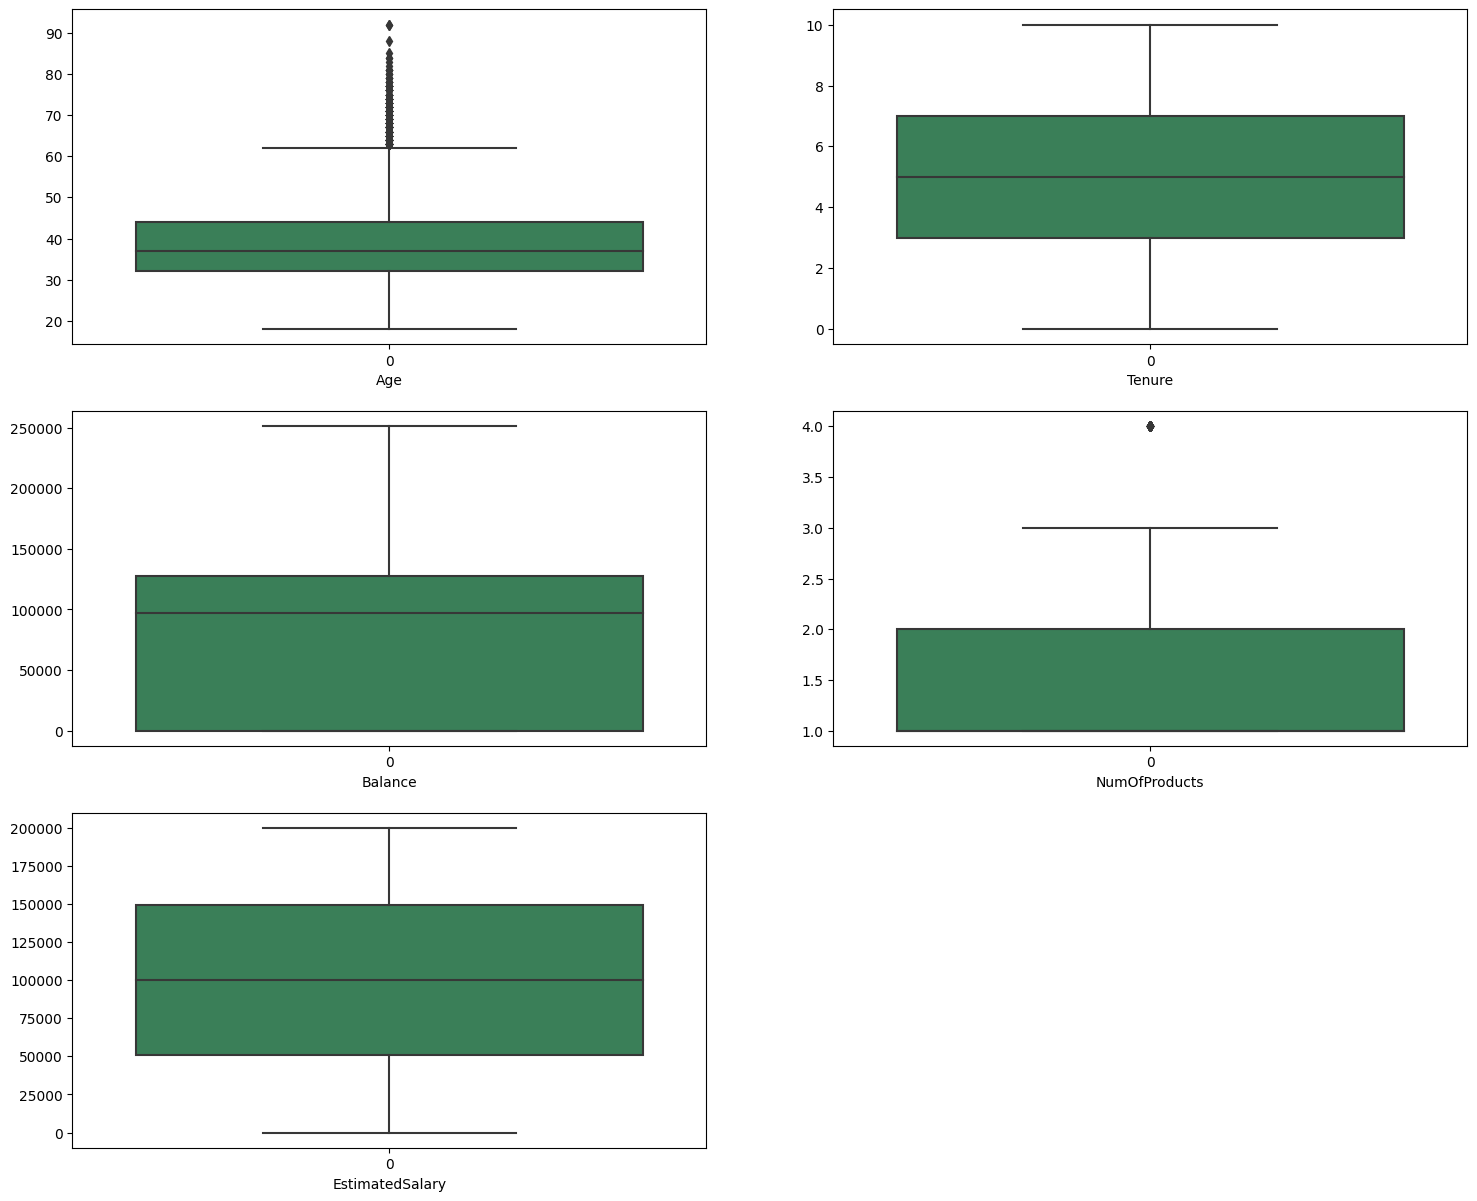

In [8]:
# Outliers detecting in Numerical features 
n=1
plt.figure(figsize=(18,20))
for i in data[numerical_vars].columns[3:]:
    if len(data[i].unique())>2:
        plt.subplot(4,2,n)
        sns.boxplot(data[i],color='seagreen')
        plt.xlabel(i)
        plt.title("")
    else:
        pass
    n+=1


### Encoding 
* convering categorical features into Numerical
* in dataset 3 features are categorical Gende, Geography and Sirname 
* Gender - Gender convert in 0s and 1s (Female=0,male=1)
* Geography - there is three unique values in this feature so we can do One hot encoding and setting n-1 so our 2 new features are ready which will be Numeric.
* Surname - is username value so not need to conver it into numeric. 

In [9]:
# Gender  
# we can convert Gender column in numerical format in (0,1)
data['Gender']= data['Gender'].map({"Female":0,"Male":1})

In [10]:
# Geography 
#label encoding (converting in 0 and 1 )
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Geography']= label_encoder.fit_transform(data["Geography"])


In [11]:
#Surname 
#Surname is a unique column so we can use label incoding so it can assighn unique values to ever datapoint.
data["Surname"] = label_encoder.fit_transform(data["Surname"])

### Normalization and standardization

* thiere is Not a single feature un which datapoints are highly spreade. so, no need of standarization and normalization 

In [12]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
#normalization of Creditscore(0 to 1)
minmax= MinMaxScaler()
data["CreditScore"] = minmax.fit_transform(data[['CreditScore']])


# standarization of Balance (mean=0, sd=1)
standard= StandardScaler()
data["Balance"]=standard.fit_transform(data[["Balance"]])


### Summary Statistics:

In [13]:
#summary statistics of Numerical variables
data.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,0.601058,0.746300,0.545700,38.921800,5.012800,-6.252776e-17,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,0.193307,0.827529,0.497932,10.487806,2.892174,1.000050e+00,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,-1.225848e+00,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,0.468000,0.000000,0.000000,32.000000,3.000000,-1.225848e+00,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,0.604000,0.000000,1.000000,37.000000,5.000000,3.319639e-01,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,0.736000,1.000000,1.000000,44.000000,7.000000,8.199205e-01,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,1.000000,2.000000,1.000000,92.000000,10.000000,2.795323e+00,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Distribution:
* How are the values distributed across different variables?


In [14]:
# color=['yellowgreen','tan','seagreen','azure','olive','teal','fuchsia',
# ,'maroon','navy','lightsalmon']

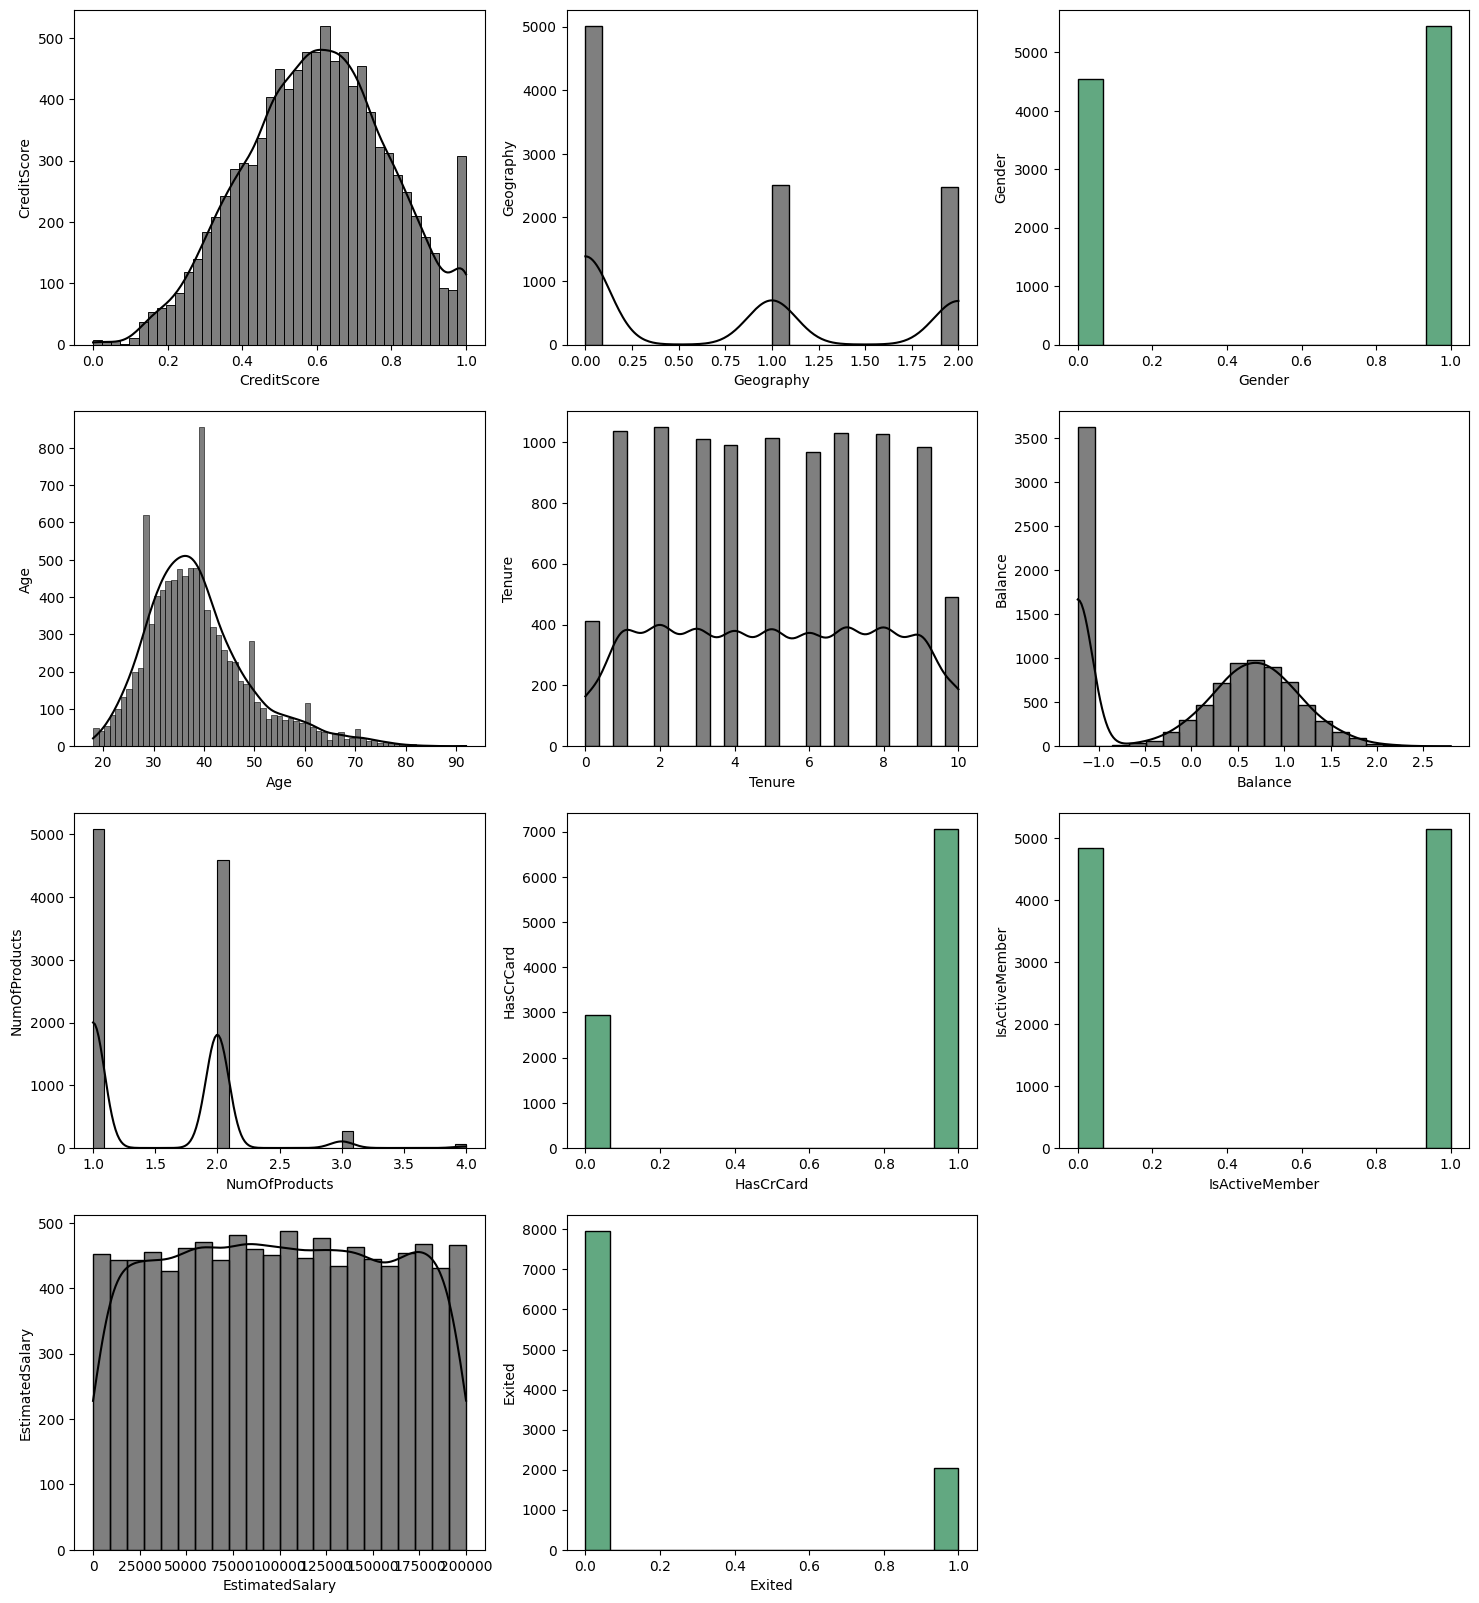

In [15]:
plt.figure(figsize=(18,20))
n=1
for i in data.columns[3:]:
    if n<= len(data.columns[3:]):
        plt.subplot(4,3,n)

        if len(data[i].unique())>2:
            sns.histplot(data[i],kde=True,color='black')
            plt.title("")
            plt.ylabel(i)
        else:
            sns.histplot(data[i],color='seagreen')
            plt.title("")
            plt.ylabel(i)
        n+=1

            
            

* Creditscore, Age and Balence are our features we can directly use for prediction and they are slightly normaly disdtributed.
* 'RowNumber', 'CustomerId', 'Surname' are not eqvivalent for our prediction so we can egnore its spread.


### Correlation Analysis:
* Is there any correlation between features?


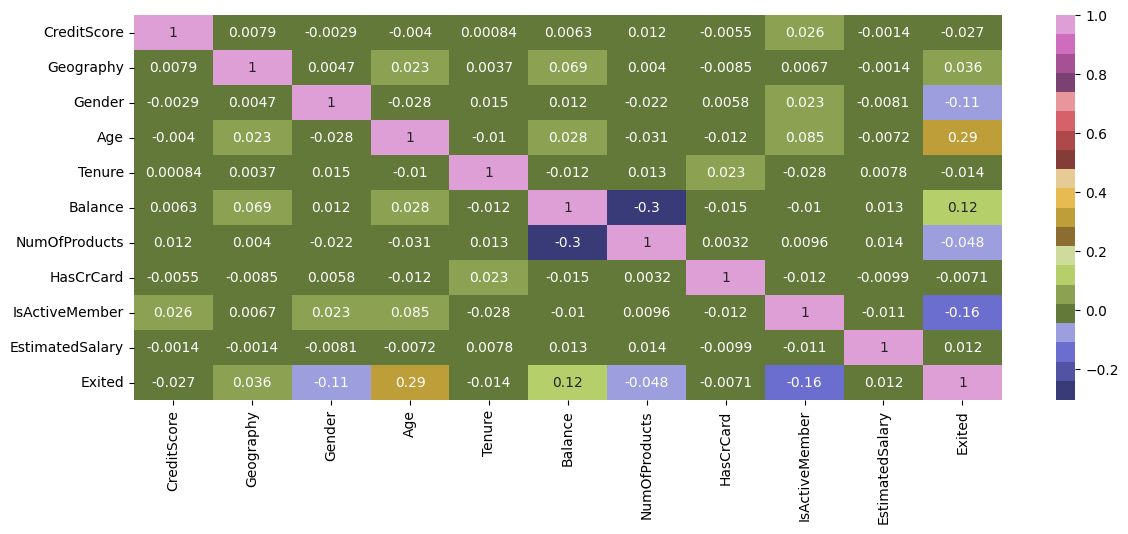

In [16]:
plt.figure(figsize=(14,5))
sns.heatmap(data.iloc[:,3:].corr(),annot=True,cmap='tab20b')
plt.show()

* as we can see features not highly corelated with each other but!!
* features 'Balence' and 'Germany' **[0.4 ]** highest correlated each other than other features.
* and features 'NumberOfProducts' and 'Balence' **[-0.30]** are negatively correlated with each other.
*  our target variable **Exited** corelated with Age around **[0.29]**.

## 4) predictive modeling 

**target variables** 
* what we are going to predict.
* so our target variable is  **Exited** which is binary



#### feature selection 

* in our dataset **RowNumber**, **CustomerId**, **Surname** is not relevent ot predict the output so we can remove them.


In [17]:
# deleting irrelavent columns
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [18]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

* Now we have 11 columns.

### Train test split 

In [19]:
data.shape

(10000, 11)

* in our dataset 10000 records so we use 80% for training and remaining 20% for testing. 
* before that we need to do seperation of dependent (output feature) and independent feature.

In [20]:
#dependent and independent feature seperation 
#independent features
x = data.iloc[: ,:-1]

#dependent/ output feature
y= data.iloc[:,-1]

In [21]:
# using skleran lets do train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.20,random_state=42)

## Model selection 

* our output feature is binary so we our model will be a classification model (prediction eather 0 or 1 )
* we are going to apply almost all Machine learning classification model and check the accuracy of each and then finalize our model.

### model 1. Logistic regression 

In [22]:
#logistic regression 
from sklearn.linear_model import LogisticRegression

linear_r = LogisticRegression()
lmodel =linear_r.fit(x_train,y_train)
lmodel
linear_predict =lmodel.predict(x_test)

### model evalueation 
* Roc_AUC score ?
* Accuracy score ? 
* classification report ?

In [23]:
#performence metrics of linear model 
from sklearn.metrics import roc_auc_score, classification_report,accuracy_score

print("roc auc score  : %.4f"% roc_auc_score(y_test,linear_predict))
print("accuracy score :%.4f"%accuracy_score(y_test,linear_predict),"\n")

print(classification_report(y_test,linear_predict))


roc auc score  : 0.5000
accuracy score :0.8035 

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000



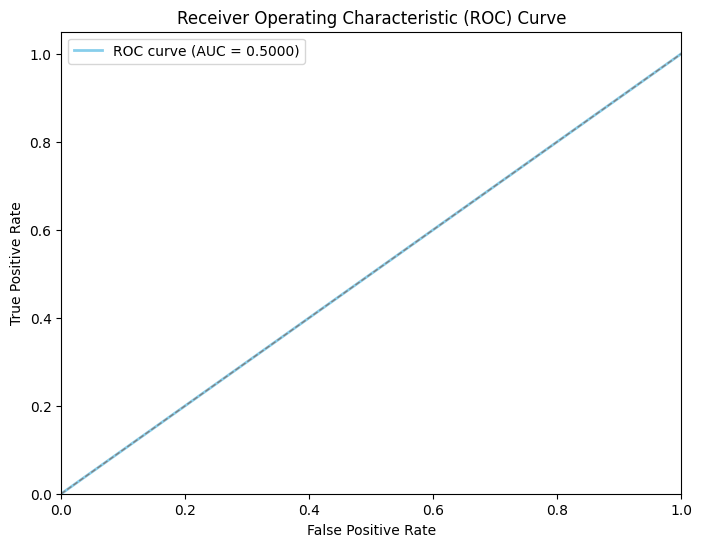

In [24]:
#lets draw ROC AUC curv 
from sklearn.metrics import roc_curve, auc

#calculate roc 
fpr, tpr, threasholds = roc_curve(y_test,linear_predict)

#calculate AUC 
roc_auc = auc(fpr,tpr)

# Plot roc curve 
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,lw=2,color='skyblue',label="ROC curve (AUC = %.4f)"%roc_auc)

plt.plot([0,1],[0,1],color='gray',lw=1,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

* ROC score is **0.500** thats why aur roc line going streght. 
* a ROC score of 0.500 suggests that the classifier is not effective at all in distinguishing between the positive and negative classes, and further improvements are necessary.
* lets try other models 

### model 2. Decision tree 


In [25]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini',random_state=42)
clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
dy_pred = clf.predict(x_test)

### model evalueation 
* Roc_AUC score ?
* Accuracy score ? 
* classification report ?


In [27]:
from sklearn.metrics import roc_auc_score, classification_report,accuracy_score

print("Roc_AUC score :%.4f"%roc_auc_score(y_test,dy_pred))
print("Accuracy score :%.4f"%accuracy_score(y_test,dy_pred),"\n")
print(classification_report(y_test,dy_pred))

Roc_AUC score :0.6846
Accuracy score :0.7820 

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.45      0.52      0.49       393

    accuracy                           0.78      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.78      0.79      2000



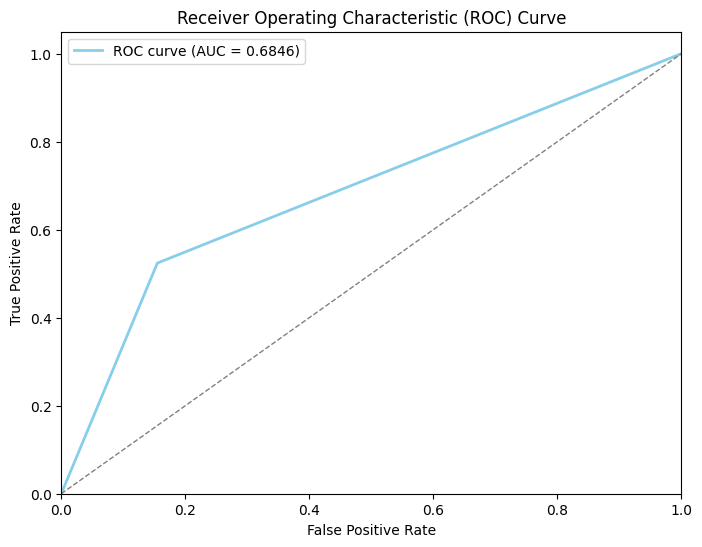

In [86]:
#lets draw ROC AUC curv 
from sklearn.metrics import roc_curve, auc

#calculate roc 
fpr, tpr, threasholds = roc_curve(y_test,dy_pred)

#calculate AUC 
roc_auc = auc(fpr,tpr)

# Plot roc curve 
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,lw=2,color='skyblue',label="ROC curve (AUC = %.4f)"%roc_auc)

plt.plot([0,1],[0,1],color='gray',lw=1,linestyle='--')

plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='upper left')
plt.show()

* ROC score of 0.68 indicates that your classifier has some discriminatory power, but further analysis and potential improvements may be necessary to enhance its performance.

### model 3. Support Vector Machines (SVM)

In [29]:
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import SGDClassifier

In [30]:
svc= SVC()
linearsvc= LinearSVC()
sgd = SGDClassifier()

In [31]:
# fitting SVC RBF 
svc_model= svc.fit(x_train,y_train)
# fitting LinearSVC
linear_svc_model = linearsvc.fit(x_train,y_train)
# fitting SGD classifier 
sgd_model = sgd.fit(x_train,y_train)

In [32]:
#predicting y_test using svc
final_svc = svc_model.predict(x_test)
# predicting y_test using linear 
final_linear = linear_svc_model.predict(x_test)
#predicting y_test using SGD classifier 
final_sgd = sgd_model.predict(x_test)

### SVC model Evaluation 
 * ROC AUC curve ?
 * Accuracy score ? 
 * classification report ?

In [33]:
from sklearn.metrics import accuracy_score, roc_curve,roc_auc_score, classification_report
print("------------------- SVC poly ------------------------------------------\n")
print("roc auc score : %.2f"%roc_auc_score(y_test,final_svc))
print("accuracy_score : %.2f"%accuracy_score(y_test,final_svc))
print(classification_report(y_test,final_svc))

print("------------------ Linear SVC ------------------------------------------\n")
print("roc auc score : %.2f"%roc_auc_score(y_test,final_linear))
print("accuracy_score : %.2f"%accuracy_score(y_test,final_linear))
print(classification_report(y_test,final_linear))

print("----------------- SGD classifier  ------------------------------------------\n")
print("roc auc score : %.2f"%roc_auc_score(y_test,final_sgd))
print("accuracy_score : %.2f"%accuracy_score(y_test,final_sgd))
print(classification_report(y_test,final_sgd))

------------------- SVC poly ------------------------------------------

roc auc score : 0.50
accuracy_score : 0.80
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

------------------ Linear SVC ------------------------------------------

roc auc score : 0.51
accuracy_score : 0.80
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1607
           1       0.31      0.03      0.05       393

    accuracy                           0.80      2000
   macro avg       0.56      0.51      0.47      2000
weighted avg       0.71      0.80      0.72      2000

----------------- SGD classifier  ------------------------------------------

roc auc score : 0.50
accuracy_score

* our our **ROC AUC score is 0.50** is same in three models so we can estimate that model is not predicting accurate outout or cant finding relation to predict **Exited 1** or **not Exited 0** perfectly.

## Random forest classifier


In [84]:
#fitting model and predicting Y_test
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=42)

rfc_model = rfc.fit(x_train,y_train)
rfc_pred = rfc_model.predict(x_test)

In [85]:
#check accuracy 
from sklearn.metrics import accuracy_score, roc_auc_score ,classification_report

print("acuuracy score :%.4f"%accuracy_score(y_test,rfc_pred))
print("acuuracy score :%.4f"%roc_auc_score(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

acuuracy score :0.8650
acuuracy score :0.7151
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.86      0.85      2000



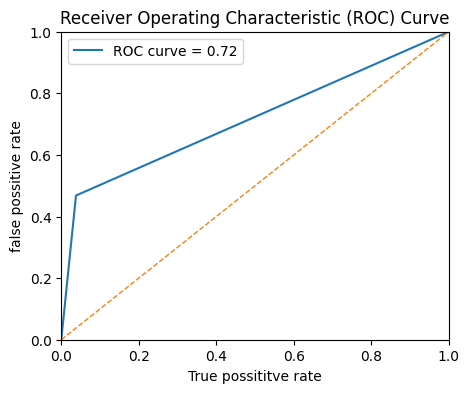

In [108]:
#draw Roc auc curv 
from sklearn.metrics import roc_curve , auc

fpr ,tpr , threshold  = roc_curve(y_test , rfc_pred)


roc_auc = auc(fpr,tpr)

plt.figure(figsize=(5,4))
plt.plot(fpr,tpr ,label="ROC curve = %.2f"%roc_auc)
plt.plot([0,1],[0,1],lw=1,linestyle='--')

plt.xlim([0.0,1])
plt.ylim([0.0,1])

plt.xlabel("True possititve rate")
plt.ylabel("false possitive rate")

plt.legend(loc='upper left')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()


* we can see in random forest our accuracy is 86% and ROC curve is 72% so we can say this is our best model and lets continue with this model. 

### Find important features with random forest 

In [136]:
feature_score = pd.Series(rfc.feature_importances_,index=x_train.columns
                         ).sort_values(ascending= False)
feature_score*100

Age                24.045295
EstimatedSalary    14.800387
CreditScore        14.236885
Balance            13.867028
NumOfProducts      13.206104
Tenure              8.093243
IsActiveMember      4.280708
Geography           3.740181
Gender              1.903241
HasCrCard           1.826927
dtype: float64

* we can see most important feature is **Age** and least important feature is **HasCrCard**.

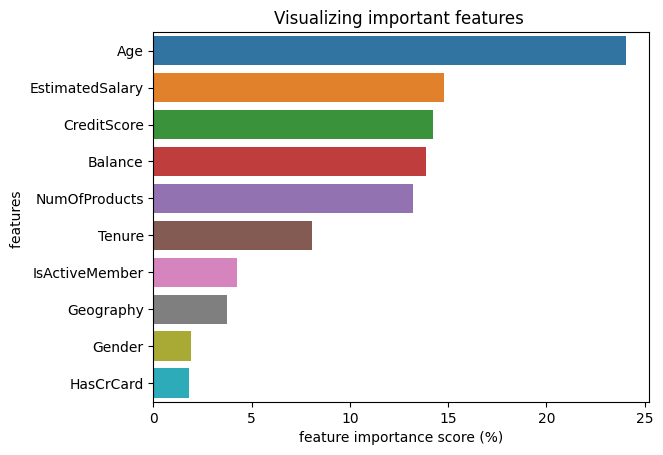

In [144]:
sns.barplot(x=feature_score*100,y=feature_score.index)

plt.xlabel("feature importance score (%)")
plt.ylabel("features ")
plt.title("Visualizing important features ")
plt.show()

### Build random forst model on selected features 

* Now we are deleting 2 features from our dataset HasCrCard and Gender because they have least importance for model prediction.



In [161]:
# less important features and Target feature
x= data.drop(["HasCrCard", "Gender", "Exited"],axis=1)

y=data['Exited']

In [162]:
#split data into train test sets
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test =train_test_split(x,y,random_state=42,test_size=0.20)

In [163]:
#now we will chech accuracy of random forest classifier 

rfc_2 = rfc.fit(x_train,y_train)

In [165]:
rfc2_pred = rfc_2.predict(x_test)

#accuracy check 
print("accuracy score %.4f"%accuracy_score(y_test,rfc2_pred))


accuracy score 0.8670


* after deleting least important features accuracy is 86.70 % and after it is 86.50 % so we can say our accuracy is increased by 0.20%.


#### Confusion matrics 
* A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model.

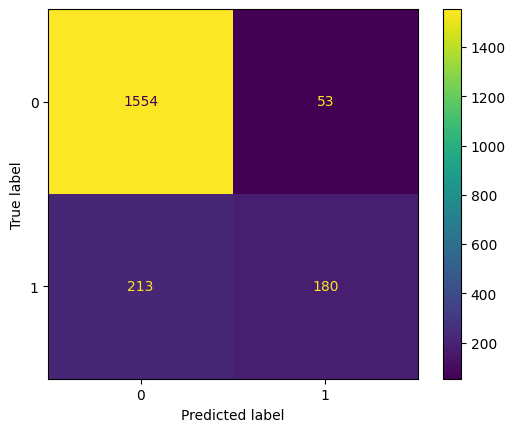

In [190]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm=confusion_matrix(y_test,rfc2_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm)
cmd.plot()
plt.show()

# Diployoing 
* **pickle API**

In [191]:
#Pickle file API 
import pickle 
pickle.dump(rfc_2,open("customer churn.pkl",'wb'))

In [192]:
#batch input 
l2pickle_model=pickle.load(open('customer churn.pkl','rb'))
predpickle =l2pickle_model.predict(x_test)

In [193]:
predpickle.shape

(2000,)

In [198]:
x_train.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [199]:
##testing on Single input 
# d2x = {'CreditScore':0.504,
#       'Geography': 1, 
#        "Age":53,
#        "Tenure":5,
#        "Balance":0.349118, 
#        "NumOfProducts":1, 
#        "IsActiveMember":1,
#        "EstimatedSalary":45038.29}

In [200]:
new=l2pickle_model.predict([list(d2x.values())])
new

array([1], dtype=int64)